## Distribution plot

In [9]:
import seaborn as sns
%matplotlib inline

In [10]:
tips = sns.load_dataset('tips')

In [11]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### distplot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

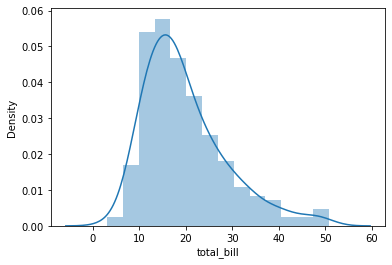

In [12]:
sns.distplot(tips['total_bill'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill'>

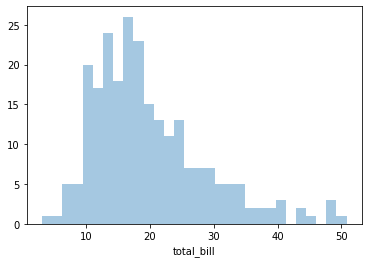

In [13]:
sns.distplot(tips['total_bill'],kde=False,bins=30)

### jointplot

#### jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with:* “scatter” * “reg” * “resid” * “kde” * “hex”

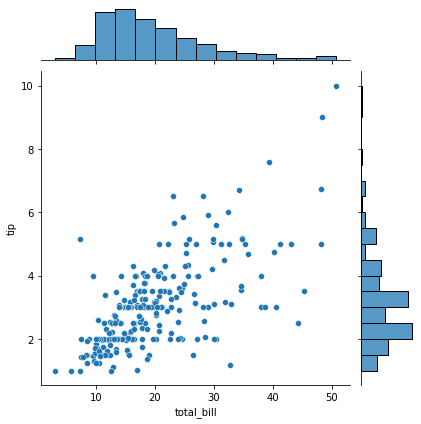

In [14]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

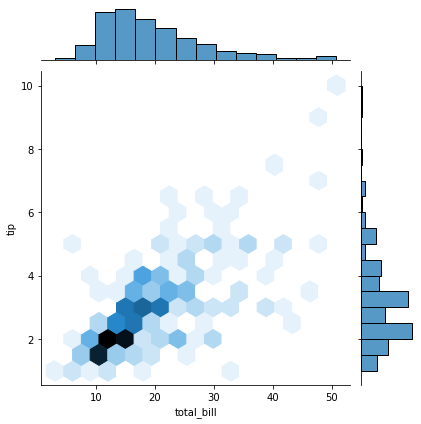

In [15]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

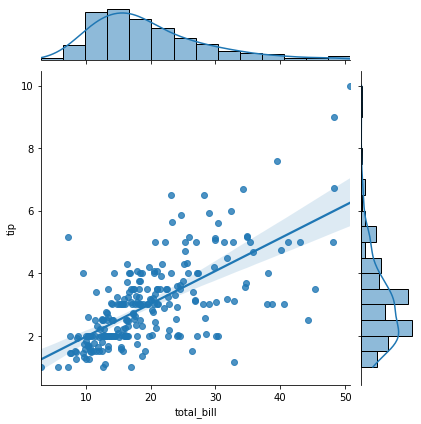

In [16]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

### pairplot

#### pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns)

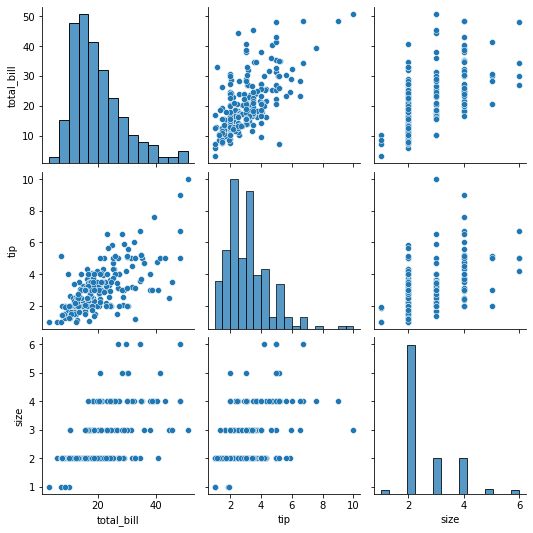

In [17]:
sns.pairplot(tips)

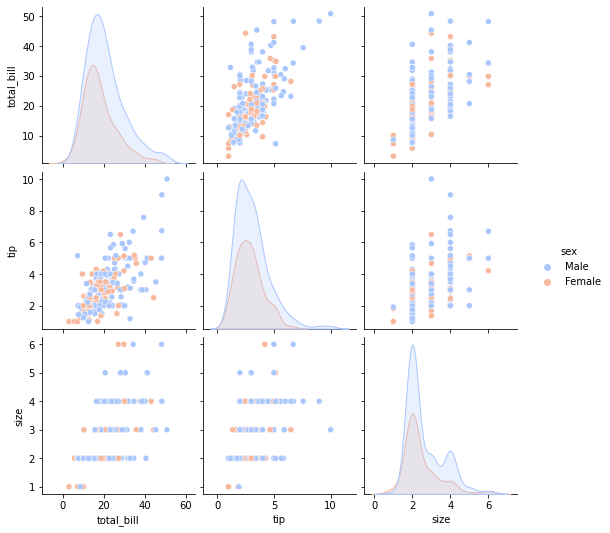

In [18]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

## rugplot
#### rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

<AxesSubplot:xlabel='total_bill'>

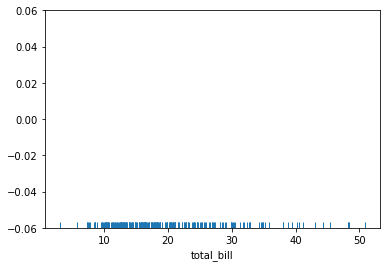

In [19]:
sns.rugplot(tips['total_bill'])

### kdeplot
#### kdeplots are Kernel Density Estimation plots. These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value

(0.0, 1.0)

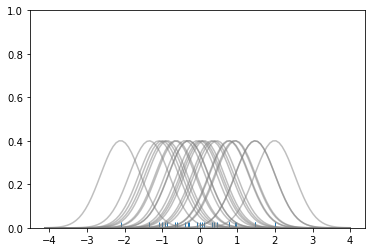

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

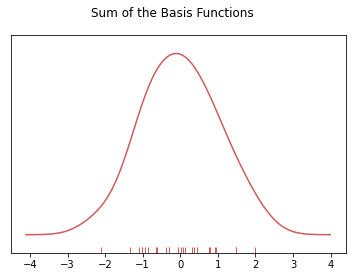

In [21]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

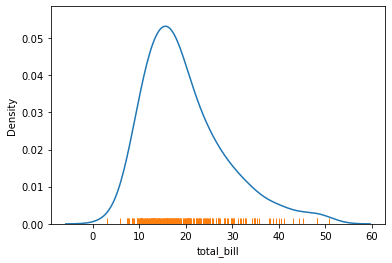

In [22]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

<AxesSubplot:xlabel='tip', ylabel='Density'>

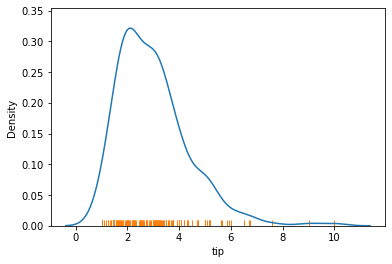

In [23]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])

## Categorical Data Plots

In [24]:
import seaborn as sns
%matplotlib inline

In [25]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### barplot and countplot
#### These very similar plots allow you to get aggregate data off a categorical feature in your data. barplot is a general plot that allows you to aggregate the categorical data based off some function, by default the mean:

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

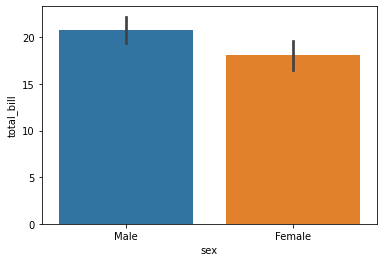

In [26]:
sns.barplot(x='sex',y='total_bill',data=tips)

In [27]:
import numpy as np

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

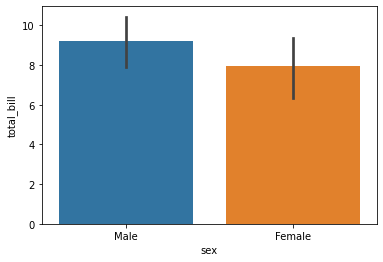

In [28]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

### countplot
#### This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value:

<AxesSubplot:xlabel='sex', ylabel='count'>

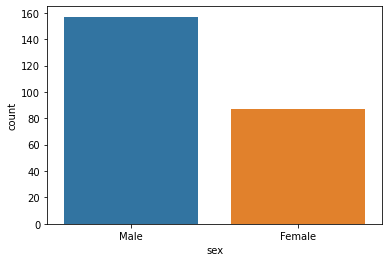

In [29]:
sns.countplot(x='sex',data=tips)

### ## boxplot and violinplot

#### boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

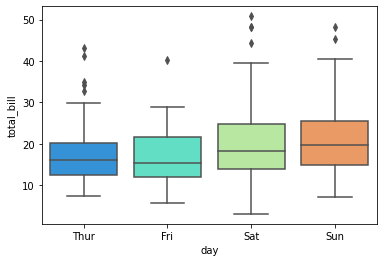

In [30]:
sns.boxplot(x="day", y="total_bill", data=tips,palette='rainbow')

<AxesSubplot:>

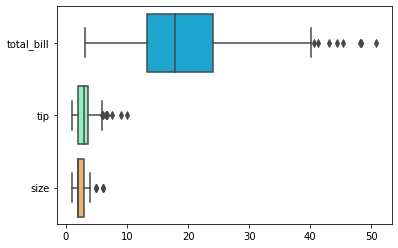

In [31]:
# Can do entire dataframe with orient='h'
sns.boxplot(data=tips,palette='rainbow',orient='h')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

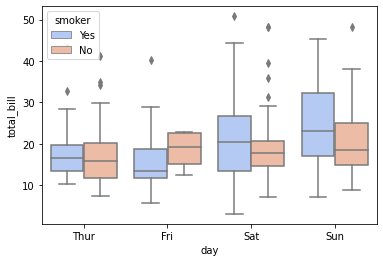

In [32]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm")

### violinplot
#### A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

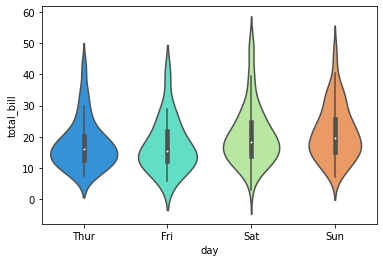

In [33]:
sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

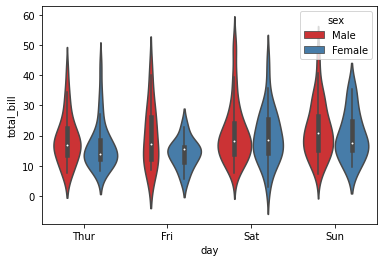

In [34]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',palette='Set1')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

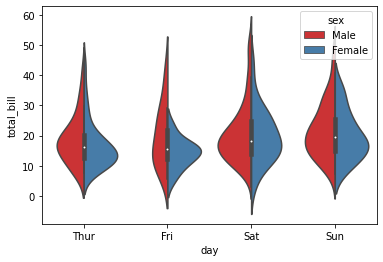

In [35]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',split=True,palette='Set1')

### stripplot and swarmplot
#### The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

#### The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

<AxesSubplot:xlabel='day', ylabel='total_bill'>

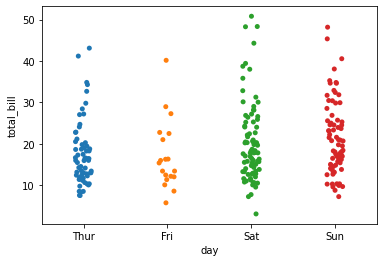

In [36]:
sns.stripplot(x="day", y="total_bill", data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

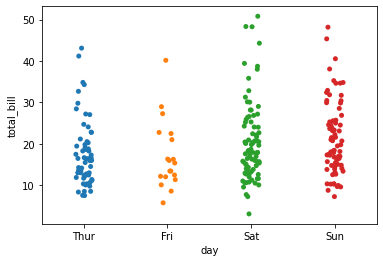

In [37]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

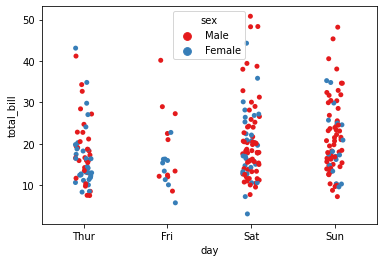

In [38]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:2792: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='day', ylabel='total_bill'>

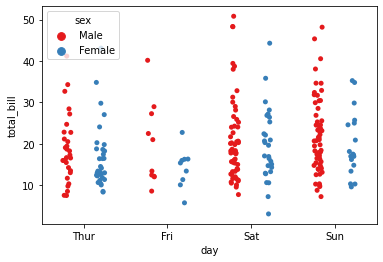

In [39]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1',split=True)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

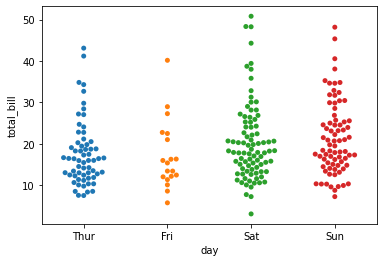

In [40]:
sns.swarmplot(x="day", y="total_bill", data=tips)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:2989: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='day', ylabel='total_bill'>

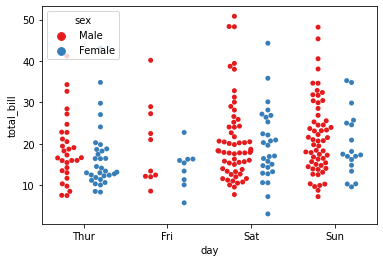

In [41]:
sns.swarmplot(x="day", y="total_bill",hue='sex',data=tips, palette="Set1", split=True)

### Combining Categorical Plots

<AxesSubplot:xlabel='tip', ylabel='day'>

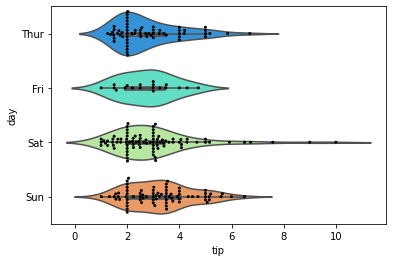

In [42]:
sns.violinplot(x="tip", y="day", data=tips,palette='rainbow')
sns.swarmplot(x="tip", y="day", data=tips,color='black',size=3)

### factorplot

#### factorplot is the most general form of a categorical plot. It can take in a kind parameter to adjust the plot type:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


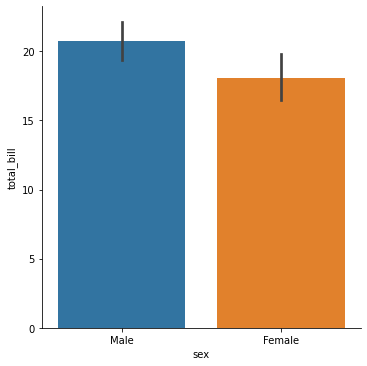

In [43]:
sns.factorplot(x='sex',y='total_bill',data=tips,kind='bar')

## Matrix Plots

#### Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data (later in the machine learning section we will learn how to formally cluster data)

In [44]:
import seaborn as sns
%matplotlib inline

In [45]:
flights = sns.load_dataset('flights')

In [46]:
tips = sns.load_dataset('tips')

In [47]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [48]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


### Heatmap

#### In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you. For example:

In [49]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [50]:
# Matrix form for correlation data
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

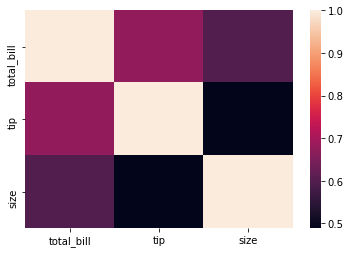

In [51]:
sns.heatmap(tips.corr())

<AxesSubplot:>

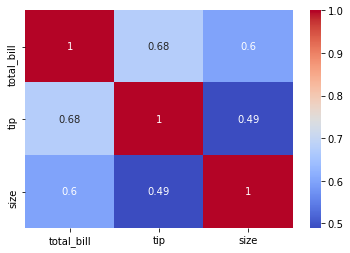

In [52]:
sns.heatmap(tips.corr(),cmap='coolwarm',annot=True)

In [53]:
flights.pivot_table(values='passengers',index='month',columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

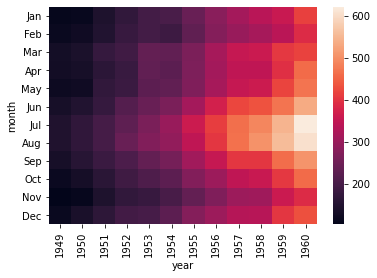

In [54]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights)

<AxesSubplot:xlabel='year', ylabel='month'>

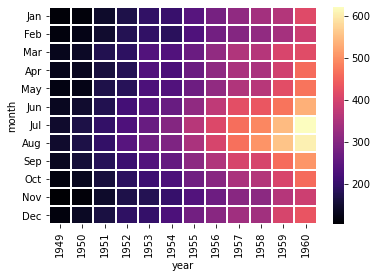

In [55]:
sns.heatmap(pvflights,cmap='magma',linecolor='white',linewidths=1)

### clustermap

#### The clustermap uses hierarchal clustering to produce a clustered version of the heatmap. For example:

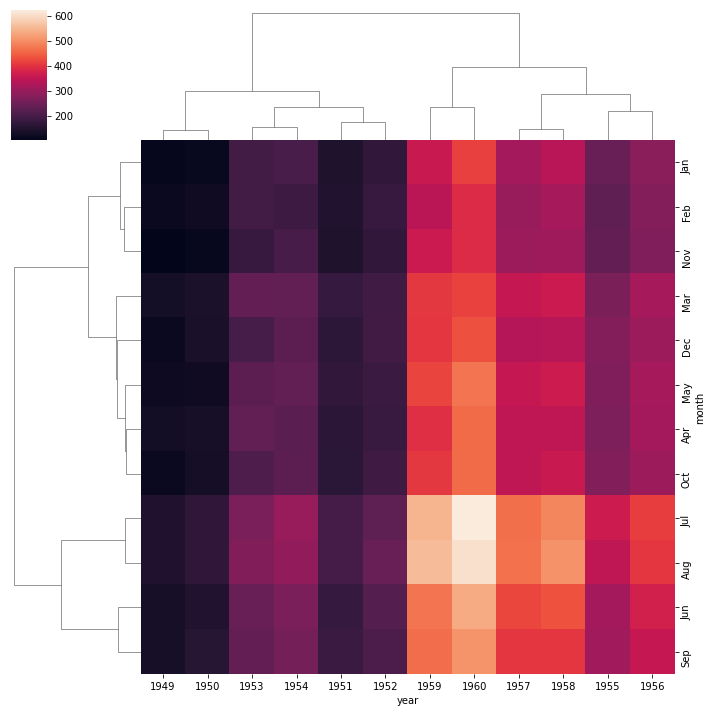

In [56]:
sns.clustermap(pvflights)

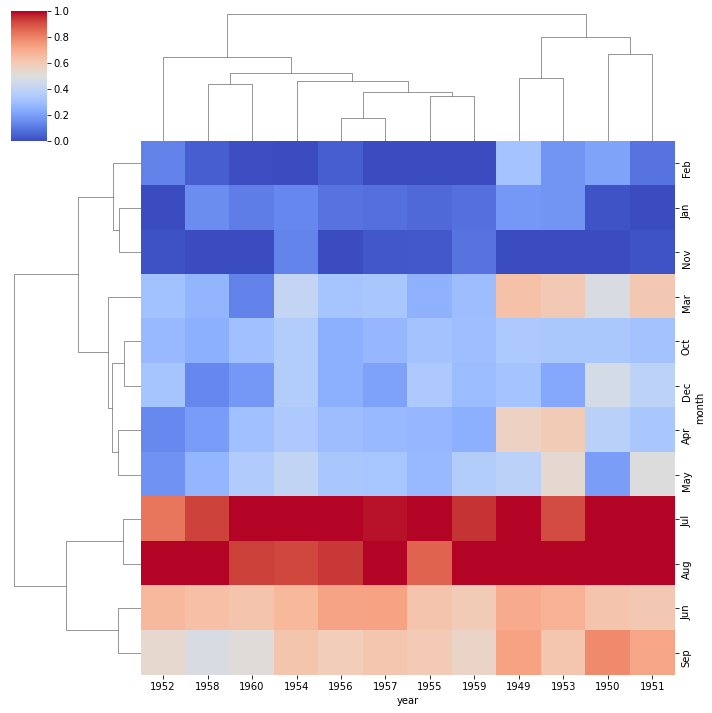

In [57]:
# More options to get the information a little clearer like normalization
sns.clustermap(pvflights,cmap='coolwarm',standard_scale=1)

## Grids

#### Grids are general types of plots that allow you to map plot types to rows and columns of a grid, this helps you create similar plots separated by features.

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
iris = sns.load_dataset('iris')

In [61]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### PairGrid

#### Pairgrid is a subplot grid for plotting pairwise relationships in a dataset.


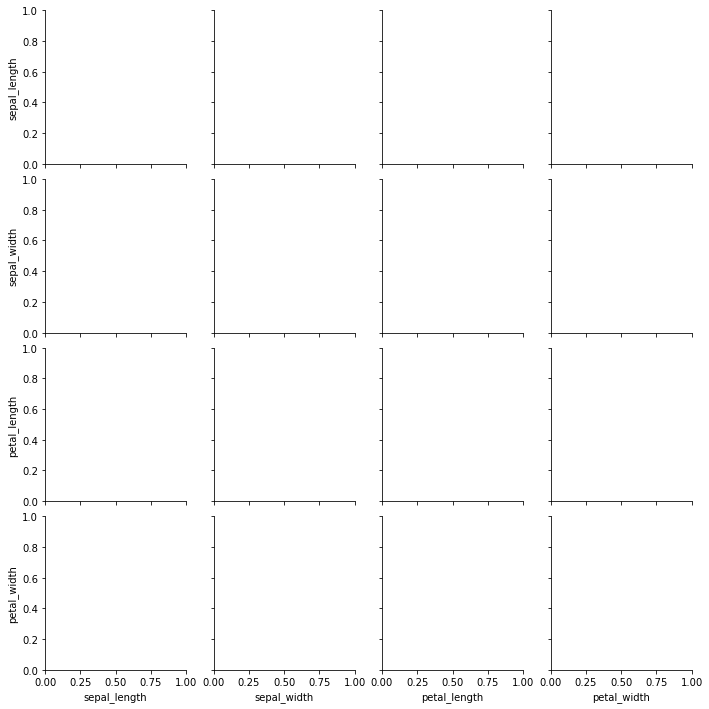

In [62]:
# Just the Grid
sns.PairGrid(iris)

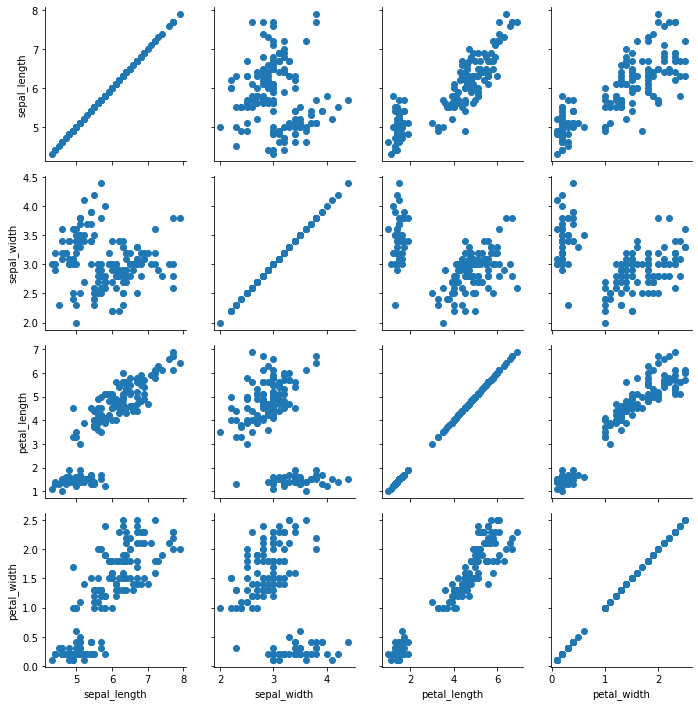

In [63]:
# Then you map to the grid
g = sns.PairGrid(iris)
g.map(plt.scatter)

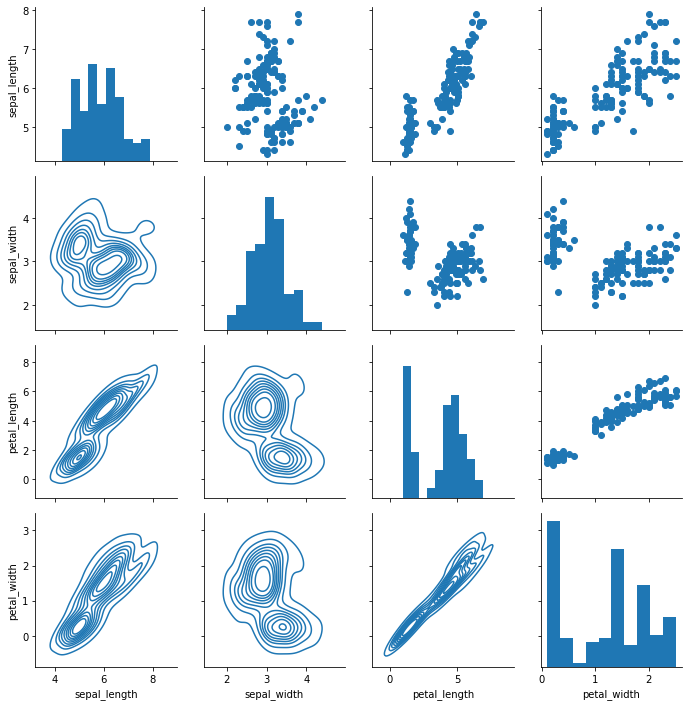

In [64]:
# Map to upper,lower, and diagonal
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

### pairplot

#### pairplot is a simpler version of PairGrid

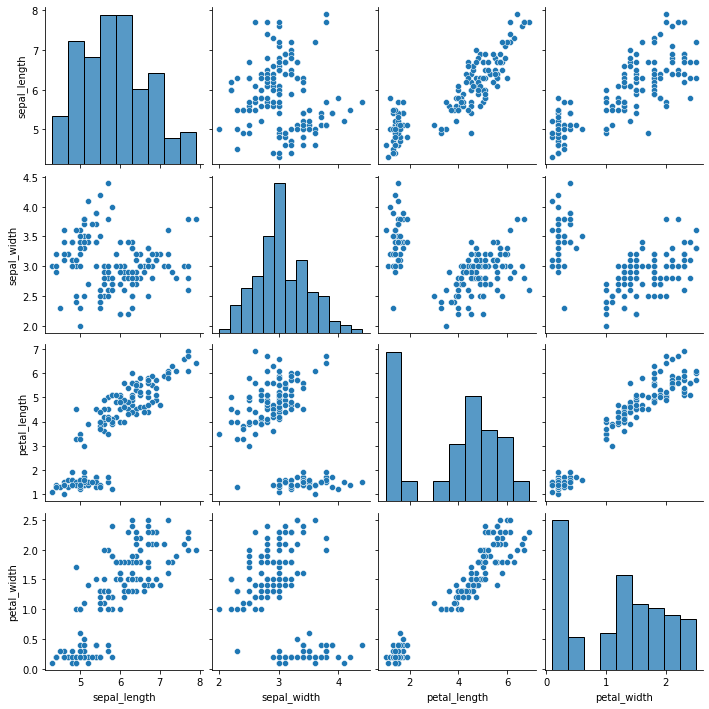

In [65]:
sns.pairplot(iris)

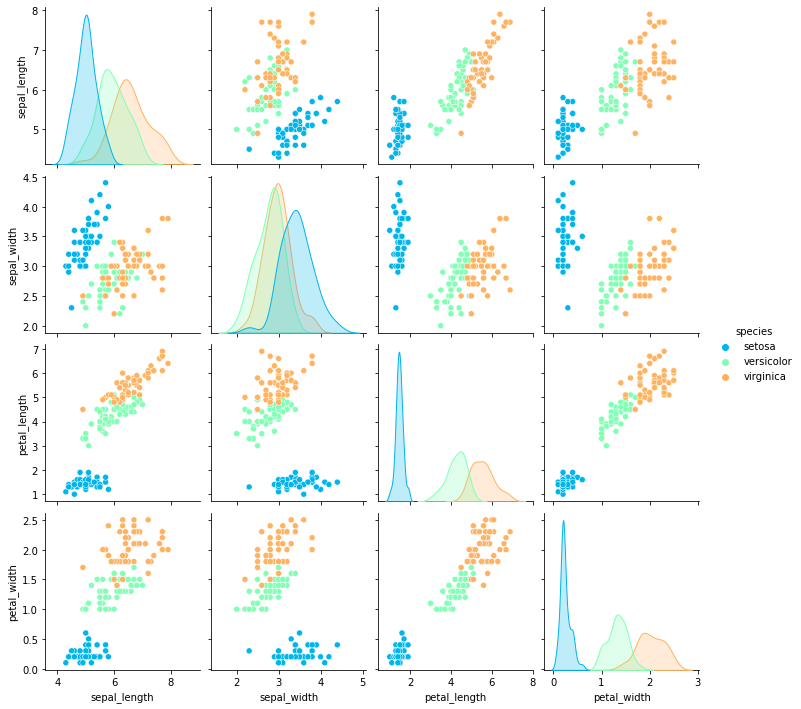

In [66]:
sns.pairplot(iris,hue='species',palette='rainbow')

### Facet Grid

#### FacetGrid is the general way to create grids of plots based off of a feature:

In [67]:
tips = sns.load_dataset('tips')

In [68]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


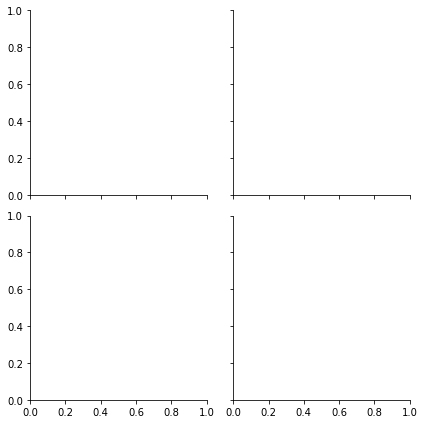

In [69]:
# Just the Grid
g = sns.FacetGrid(tips, col="time", row="smoker")

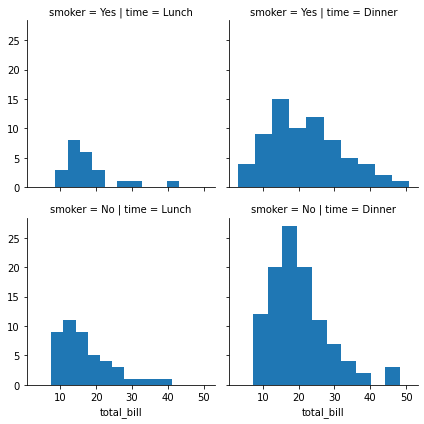

In [70]:
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill")

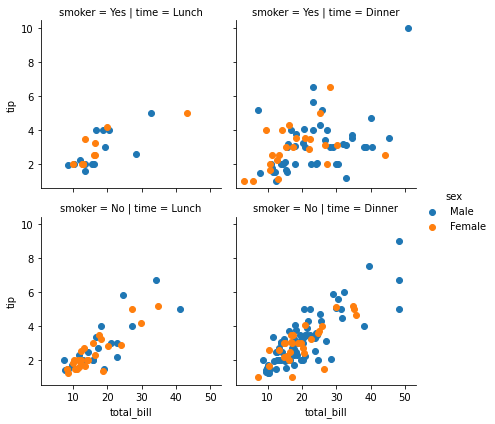

In [71]:
g = sns.FacetGrid(tips, col="time",  row="smoker",hue='sex')
# Notice hwo the arguments come after plt.scatter call
g = g.map(plt.scatter, "total_bill", "tip").add_legend()

### JointGrid

#### JointGrid is the general version for jointplot() type grids, for a quick example:

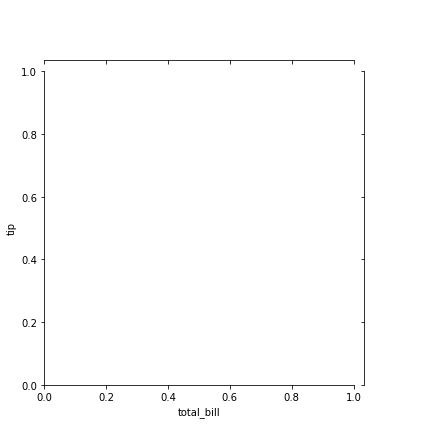

In [72]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)

## Regression Plots

In [74]:
import seaborn as sns
%matplotlib inline

In [75]:
tips = sns.load_dataset('tips')

In [76]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Implot()

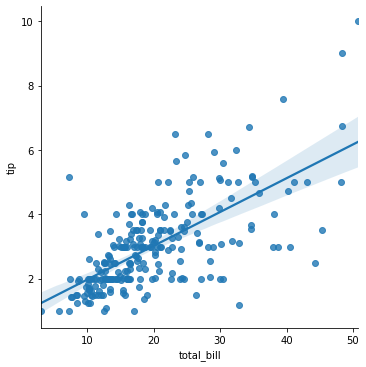

In [77]:
sns.lmplot(x='total_bill',y='tip',data=tips)

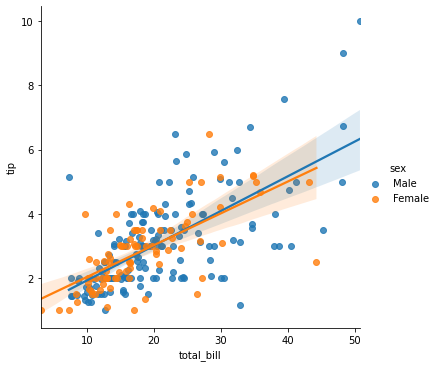

In [78]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex')

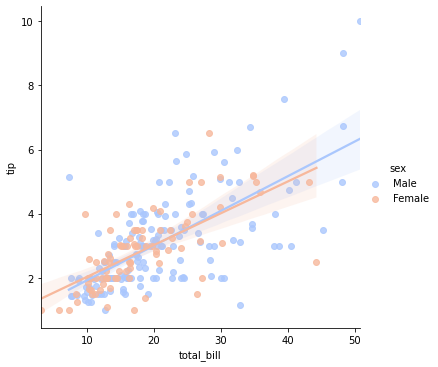

In [79]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm')

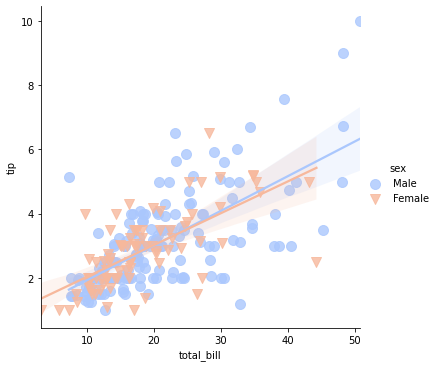

In [80]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm',
           markers=['o','v'],scatter_kws={'s':100})

### Using a Grid

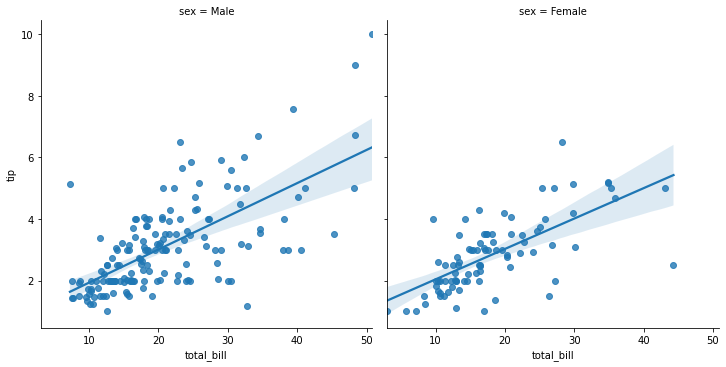

In [81]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex')

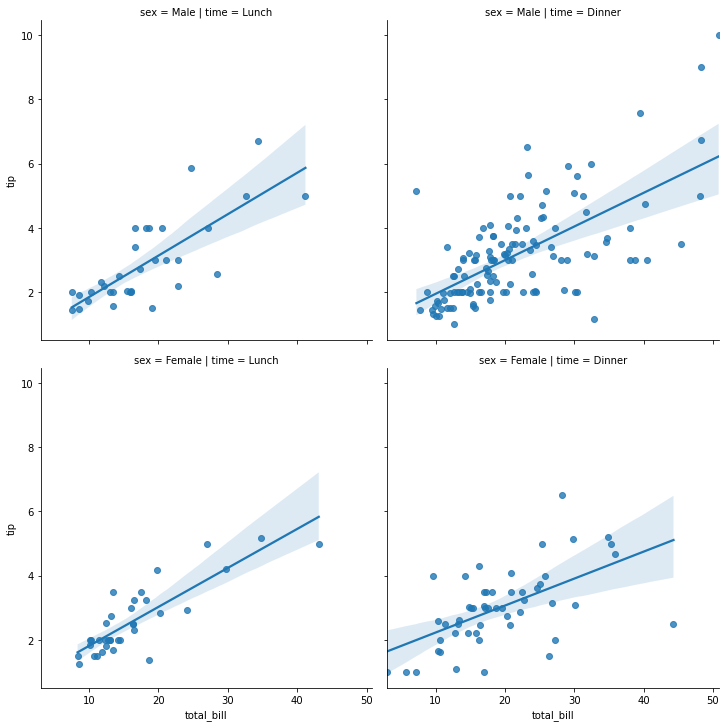

In [82]:
sns.lmplot(x="total_bill", y="tip", row="sex", col="time",data=tips)

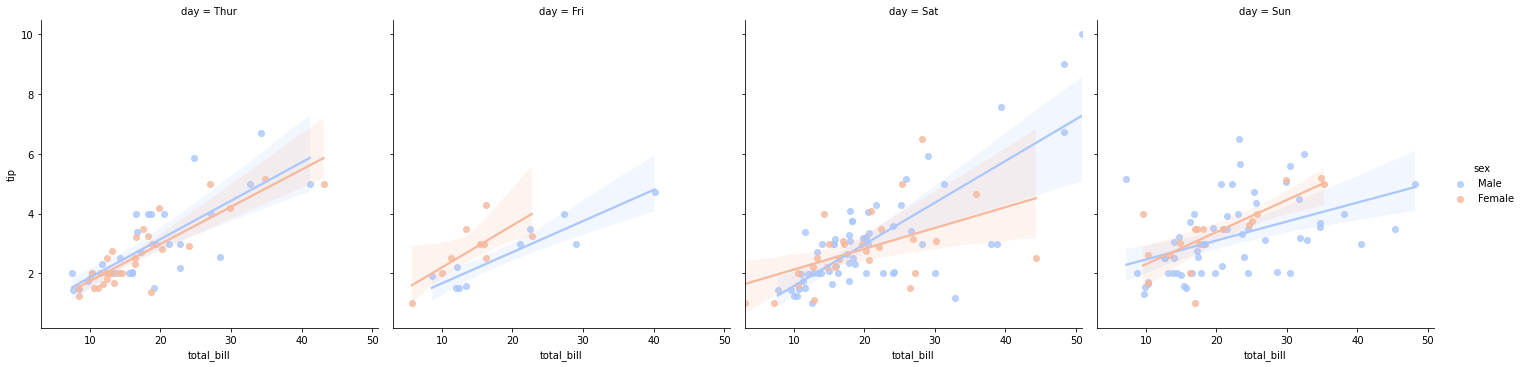

In [83]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm')

### Aspect and size

#### Seaborn figures can have their size and aspect ratio adjusted with the size and aspect parameters:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


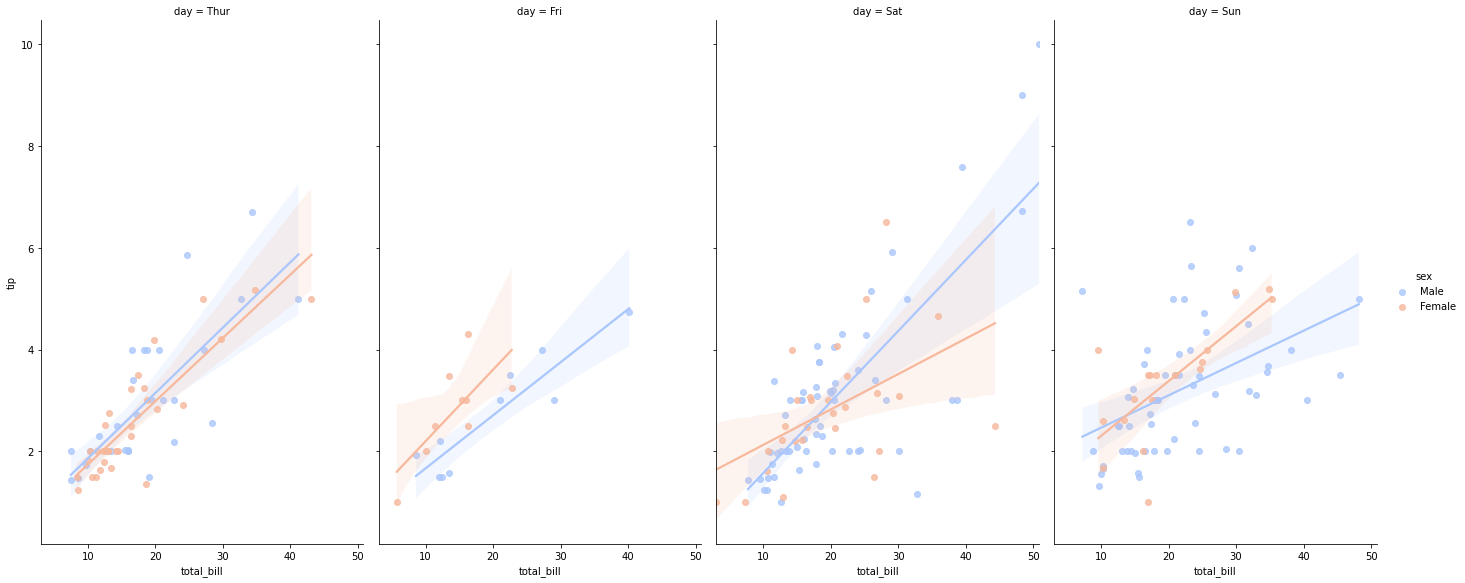

In [85]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm',
          aspect=0.6,size=8)

## Style and Color

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
tips = sns.load_dataset('tips')

### Styles

<AxesSubplot:xlabel='sex', ylabel='count'>

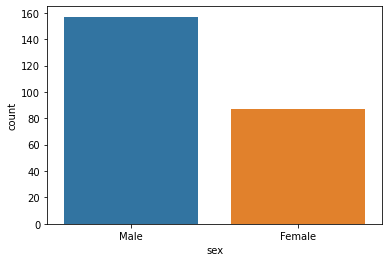

In [87]:
sns.countplot(x='sex',data=tips)

<AxesSubplot:xlabel='sex', ylabel='count'>

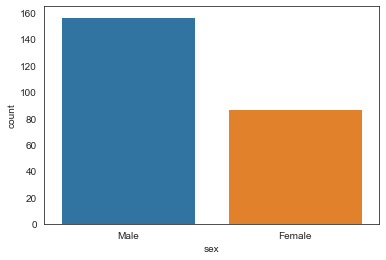

In [88]:
sns.set_style('white')
sns.countplot(x='sex',data=tips)

<AxesSubplot:xlabel='sex', ylabel='count'>

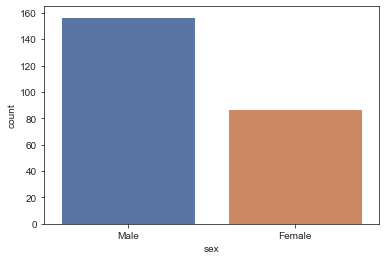

In [89]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips,palette='deep')

### Spine Removal

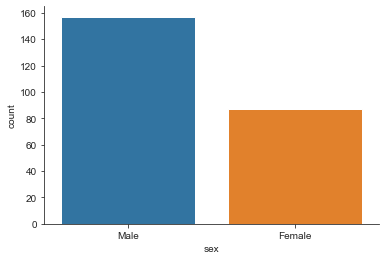

In [90]:
sns.countplot(x='sex',data=tips)
sns.despine()

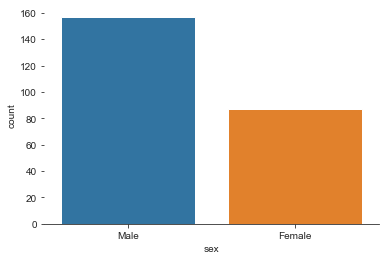

In [91]:
sns.countplot(x='sex',data=tips)
sns.despine(left=True)

### Size and Aspect
#### You can use matplotlib's *plt.figure(figsize=(width,height) * to change the size of most seaborn plots.

#### You can control the size and aspect ratio of most seaborn grid plots by passing in parameters: size, and aspect. For example:

<AxesSubplot:xlabel='sex', ylabel='count'>

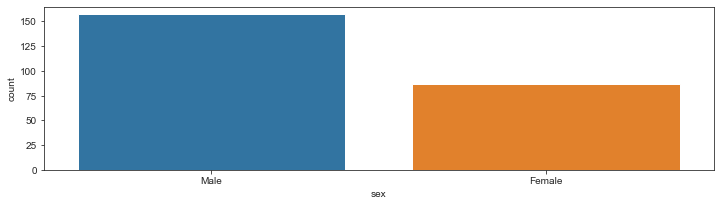

In [92]:
# Non Grid Plot
plt.figure(figsize=(12,3))
sns.countplot(x='sex',data=tips)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


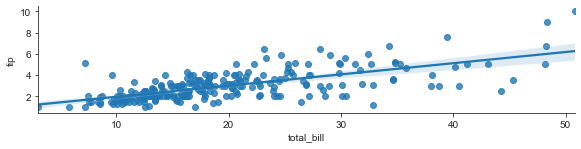

In [93]:
# Grid Type Plot
sns.lmplot(x='total_bill',y='tip',size=2,aspect=4,data=tips)

### Scale and Context

#### The set_context() allows you to override default parameters:

<AxesSubplot:xlabel='sex', ylabel='count'>

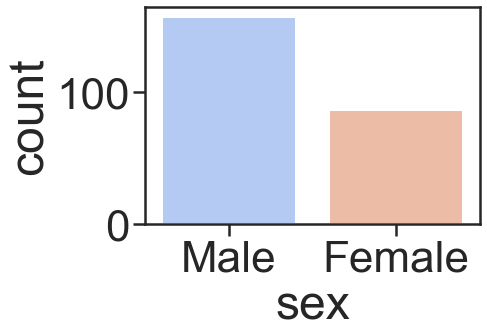

In [95]:
sns.set_context('poster',font_scale=2)
sns.countplot(x='sex',data=tips,palette='coolwarm')

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
sns.set_style('whitegrid')

In [99]:
titanic = sns.load_dataset('titanic')

In [100]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


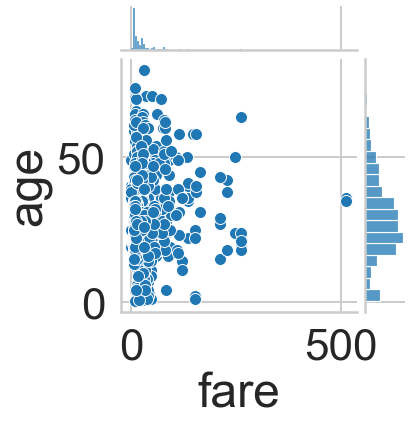

In [101]:
sns.jointplot(x='fare',y='age',data=titanic)

<AxesSubplot:xlabel='fare'>

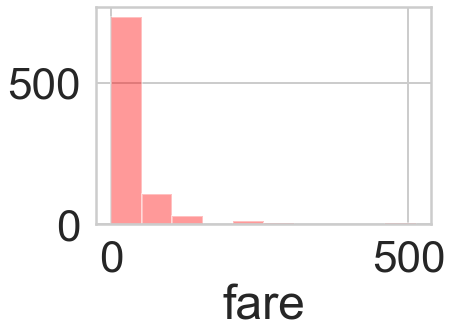

In [103]:
sns.distplot(titanic['fare'],bins=10,kde=False,color='red')

<AxesSubplot:xlabel='class', ylabel='age'>

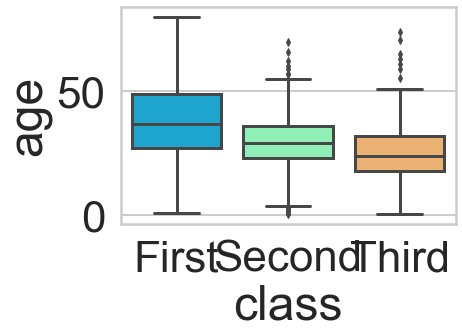

In [104]:
sns.boxplot(x='class',y='age',data=titanic,palette='rainbow')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='class', ylabel='age'>

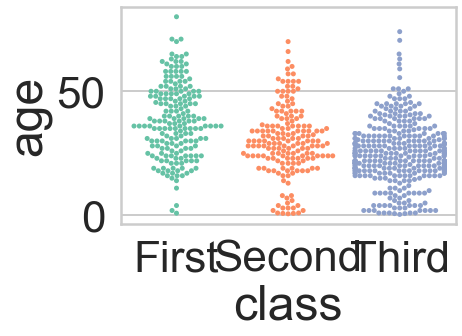

In [105]:
sns.swarmplot(x='class',y='age',data=titanic,palette='Set2')

<AxesSubplot:xlabel='sex', ylabel='count'>

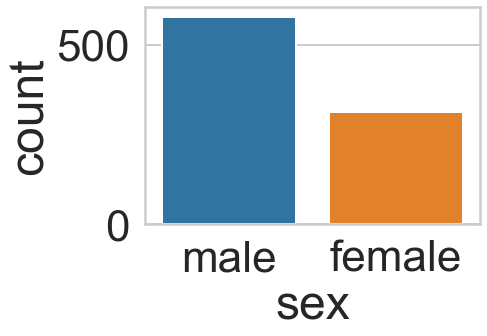

In [106]:
sns.countplot(x='sex',data=titanic)

Text(0.5, 1.0, 'titanic.corr()')

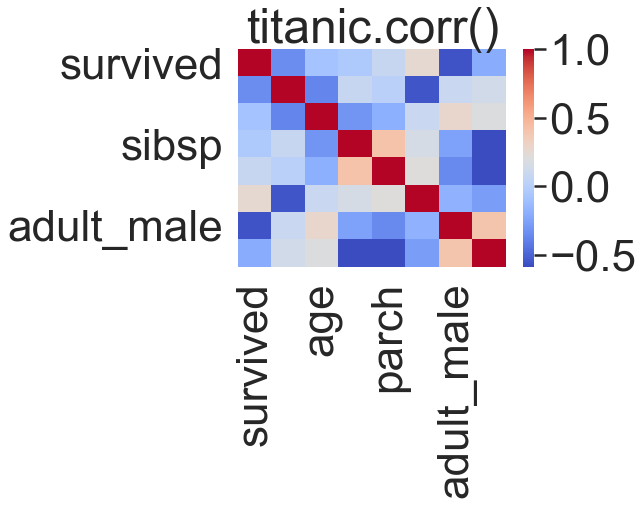

In [107]:
sns.heatmap(titanic.corr(),cmap='coolwarm')
plt.title('titanic.corr()')